## Modelagem de absorvedores porosos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from macroscopic_models import delany_bazley, jca

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# define frequency space
f_start = 100
f_end = 10000
f = np.arange(f_start, f_end, step=1)

# air properties
rho0 = 1.21  # [kg/m³] air density
c0 = 343  # [m/s] sound speed

### 1. Absorvedor poroso sobre superfície rígida

#### 1.1. Influência da espessura

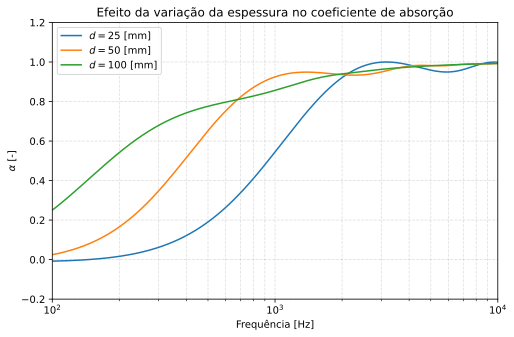

In [6]:
# material properties
depths = np.array([0.025, 0.050, 0.100])  # [m] depth
sigma = 25000  # [N*s/m^4] flux resistivity
Zc, kc = delany_bazley(f, sigma, c0, rho0)  # delany-basley parameters

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title(r"Efeito da variação da espessura no coeficiente de absorção")

ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)

labels = [r"$d = 25~\text{[mm]}$", r"$d = 50~\text{[mm]}$", r"$d = 100~\text{[mm]}$"]

for d, label in zip(depths, labels):
    Zs = -1j * (Zc / np.tan(kc * d))  # surface impedance
    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))  # reflection coefficient
    alpha = 1 - (abs(Vp)) ** 2  # absorption coefficient

    ax.semilogx(f, alpha, label=label)

ax.legend()
plt.show()

#### 1.2. Influência da resistividade ao fluxo

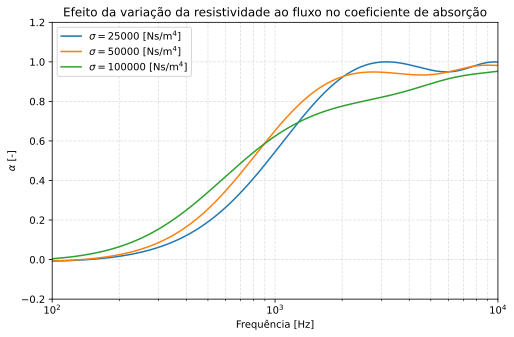

In [7]:
# material properties
d = 0.025  # [m] depth
flux_resistivities = np.array([25e3, 50e3, 100e3])  # [N*s/m^4] flux resistivity

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title(r"Efeito da variação da resistividade ao fluxo no coeficiente de absorção")

ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)
labels = [
    r"$\sigma = 25000~[\text{Ns/m}^4]$",
    r"$\sigma = 50000~[\text{Ns/m}^4]$",
    r"$\sigma = 100000~[\text{Ns/m}^4]$",
]

for sigma, label in zip(flux_resistivities, labels):
    Zc, kc = delany_bazley(f, sigma, c0, rho0)  # delany-basley parameters
    Zs = -1j * (Zc / np.tan(kc * d))  # surface impedance
    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))  # reflection coefficient
    alpha = 1 - (abs(Vp)) ** 2  # absorption coefficient

    ax.semilogx(f, alpha, label=label)

ax.legend()
plt.show()

### 2. Absorvedor poroso sobre gap de ar

#### 2.1. Influência do tamanho do colchão de ar

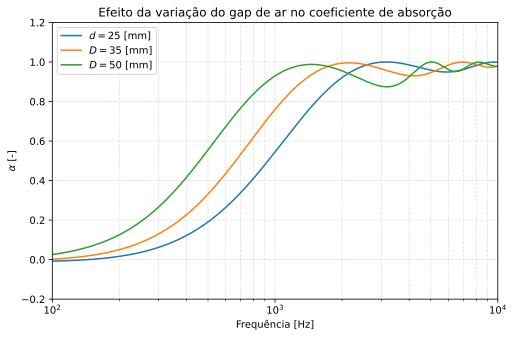

In [5]:
k0 = (2 * np.pi * f) / c0  # [rad/m] wave number
d = 0.025  # [m] depth
air_gaps = np.array([0.035, 0.050])  # [m] air gap
sigma = 25000  # [N*s/m^4] flux resistivity

fig, ax = plt.subplots(figsize=(8, 5))

labels = [r"$D = 35~[\text{mm}]$", r"$D = 50~[\text{mm}]$"]


ax.set_title(r"Efeito da variação do gap de ar no coeficiente de absorção")
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)

# add absorber over rigid surface
Zc, kc = delany_bazley(f, sigma, c0, rho0)
Zs = -1j * (Zc / np.tan(kc * d))  # surface impedance
Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))  # reflection coefficient
alpha = 1 - (abs(Vp)) ** 2  # absorption coefficient
ax.semilogx(f, alpha, label=r"$d = 25~[\text{mm}]$")


# add traces with air gap
for D, label in zip(air_gaps, labels):
    Zs_ar = -1j * rho0 * c0 / np.tan(k0 * (D - d))
    Zc, kc = delany_bazley(f, sigma, c0, rho0)  # delany-basley parameters
    Zs = (((-1j * Zs_ar * Zc) / np.tan(kc * d)) + Zc**2) / (
        Zs_ar - ((1j * Zc) / np.tan(kc * d))
    )  # two layer system surface impedance
    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))  # reflection coefficient
    alpha = 1 - (abs(Vp)) ** 2  # absorption coefficient
    ax.semilogx(f, alpha, label=label)


ax.legend()
plt.show()